# Modellvergleich basierend auf dem $F_1$-Score
Dieses Notebook lädt die Metrikdaten aus einer CSV-Datei und visualisiert die F1-Scores der Testdaten als Balkendiagramm und führt Anova F-Tests und Kruskal-Wallis Tests durch.  

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kruskal, f_oneway
import seaborn as sns
import scikit_posthocs as sp

In [167]:
PATH = "/Users/I566184/bachelorarbeit_coding/mesogeos/csv/crossValidation"
mean_df = pd.read_csv(f"{PATH}/mean_values_crossValidation.csv", sep=",") #change to semicolon if needed
std_df = pd.read_csv(f"{PATH}/std_values_crossValidation.csv", sep=",") #change to semicolon if needed
score = "F1_Training"  # Der Score, der für die Visualisierung verwendet wird

In [86]:
mean_df

,Abbreviations,F1_Training,F1_Validation,F1_Testing,AUCPR_Training,AUCPR_Validation,AUCPR_Testing
0,RF,0.983999,0.746053,0.751735,0.998956,0.843252,0.841199
1,CNN,0.796122,0.796122,0.788019,0.860022,0.860022,0.857089
2,MLP,0.811846,0.811846,0.805153,0.885205,0.885205,0.878071
3,LSTM,0.813372,0.813372,0.805137,0.884679,0.884679,0.876242
4,GRU,0.808862,0.808862,0.800572,0.881954,0.881954,0.874135
5,GTN,0.819039,0.819039,0.807866,0.887439,0.887439,0.882754
6,TFT,0.811340,0.811340,0.801551,0.885149,0.885149,0.877083
7,Transformer,0.819077,0.819077,0.812343,0.889747,0.889747,0.886204


In [168]:
std_df

,Abbreviations,F1_Training,F1_Validation,F1_Testing,AUCPR_Training,AUCPR_Validation,AUCPR_Testing
0,MLP,0.017570,0.024596,1.149190e-16,0.019120,0.024726,0.000000e+00
1,CNN,0.006472,0.021605,2.298380e-16,0.007249,0.023274,2.298380e-16
2,LSTM,0.014433,0.017950,3.447570e-16,0.013152,0.023958,2.298380e-16
3,GRU,0.011517,0.020700,1.149190e-16,0.013285,0.025310,0.000000e+00
4,TRANSFORMER,0.020634,0.023614,0.000000e+00,0.021694,0.025551,1.149190e-16
5,GTN,0.018620,0.025728,1.149190e-16,0.022019,0.022901,1.149190e-16
6,TFT,0.022870,0.022673,1.149190e-16,0.029110,0.024899,1.149190e-16
7,RF,0.000852,0.057174,2.865617e-02,0.000093,0.027739,2.463487e-02


In [169]:
merge_df = pd.merge(mean_df, std_df, on="Abbreviations", suffixes=('_mean', '_std'))
merge_df = merge_df.sort_values(by='F1_Testing_mean', ascending=True)  
merge_df

,Abbreviations,F1_Training_mean,F1_Validation_mean,F1_Testing_mean,AUCPR_Training_mean,AUCPR_Validation_mean,AUCPR_Testing_mean,F1_Training_std,F1_Validation_std,F1_Testing_std,AUCPR_Training_std,AUCPR_Validation_std,AUCPR_Testing_std
7,RF,0.983999,0.746053,0.751735,0.998956,0.843252,0.841199,0.000852,0.057174,2.865617e-02,0.000093,0.027739,2.463487e-02
6,TFT,0.808841,0.811340,0.756187,0.876551,0.885149,0.873567,0.022870,0.022673,1.149190e-16,0.029110,0.024899,1.149190e-16
5,GTN,0.814943,0.810005,0.791690,0.888537,0.881576,0.878081,0.018620,0.025728,1.149190e-16,0.022019,0.022901,1.149190e-16
4,TRANSFORMER,0.833120,0.819077,0.807778,0.906592,0.889747,0.875241,0.020634,0.023614,0.000000e+00,0.021694,0.025551,1.149190e-16
3,GRU,0.816778,0.808862,0.809002,0.889188,0.881954,0.899027,0.011517,0.020700,1.149190e-16,0.013285,0.025310,0.000000e+00
2,LSTM,0.825007,0.813372,0.819558,0.894300,0.884679,0.905924,0.014433,0.017950,3.447570e-16,0.013152,0.023958,2.298380e-16
1,CNN,0.815675,0.796122,0.819919,0.889792,0.860022,0.891164,0.006472,0.021605,2.298380e-16,0.007249,0.023274,2.298380e-16
0,MLP,0.828276,0.811846,0.820966,0.905288,0.885205,0.907116,0.017570,0.024596,1.149190e-16,0.019120,0.024726,0.000000e+00


In [76]:
f1_df = mean_df[["Abbreviations", score, "F1_Testing"]].copy()
f1_df = f1_df.sort_values(by='F1_Testing', ascending=True)  # 🔁 aufsteigend sortieren
f1_df

,Abbreviations,F1_Training,F1_Testing
0,RF,0.983999,0.751735
1,CNN,0.796122,0.788019
4,GRU,0.808862,0.800572
6,TFT,0.811340,0.801551
3,LSTM,0.813372,0.805137
2,MLP,0.811846,0.805153
5,GTN,0.819039,0.807866
7,Transformer,0.819077,0.812343


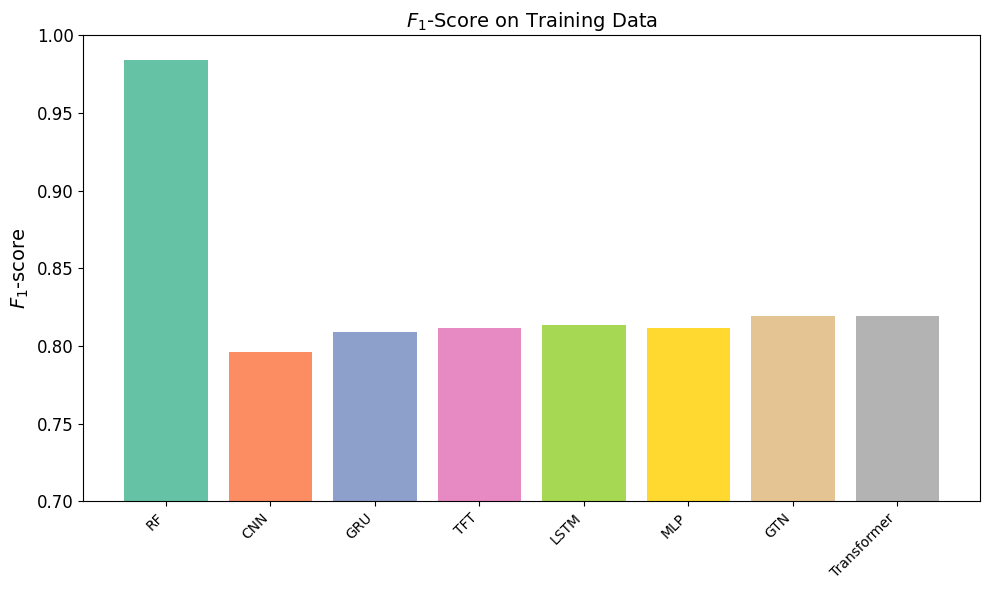

In [77]:
plt.figure(figsize=(10, 6))
bars = plt.bar(f1_df["Abbreviations"], f1_df[score], color=plt.cm.Set2.colors) #plt.cm.Pastel1.colors

plt.ylabel("$F_1$-score", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=12)
plt.ylim(0.7, 1.00) #adapt the y-axis limits as needed
plt.title("$F_1$-Score on Training Data", fontsize=14)
plt.tight_layout()
plt.show()


In [164]:
def create_mean_std_plot(data):
    score = f"F1_{data}_mean"
    score_std = f"F1_{data}_std"
    
    plt.figure(figsize=(10, 6))
    
    bars = plt.bar(
        merge_df["Abbreviations"],
        merge_df[score],
        yerr=merge_df[score_std],         
        capsize=5,                     
        color=plt.cm.Set2.colors,
    )
    
    plt.ylabel("$F_1$-score", fontsize=14, fontweight='medium')
    plt.xticks(rotation=45, ha="right", fontsize=12, fontweight='medium')
    plt.yticks(fontsize=14)
    plt.ylim(0.5, 1.00)  # ggf. anpassen
    plt.title(f"$F_1$-Score on Cross-Validated {data} Splits", fontsize=14, fontweight='medium')
    plt.tight_layout()
    plt.show()


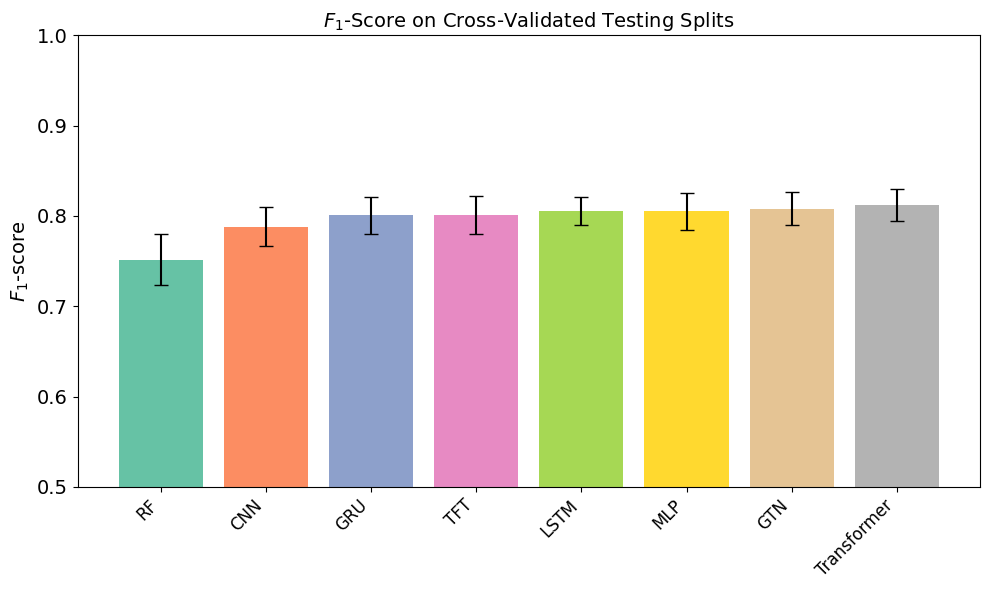

In [166]:
create_mean_std_plot("Testing")

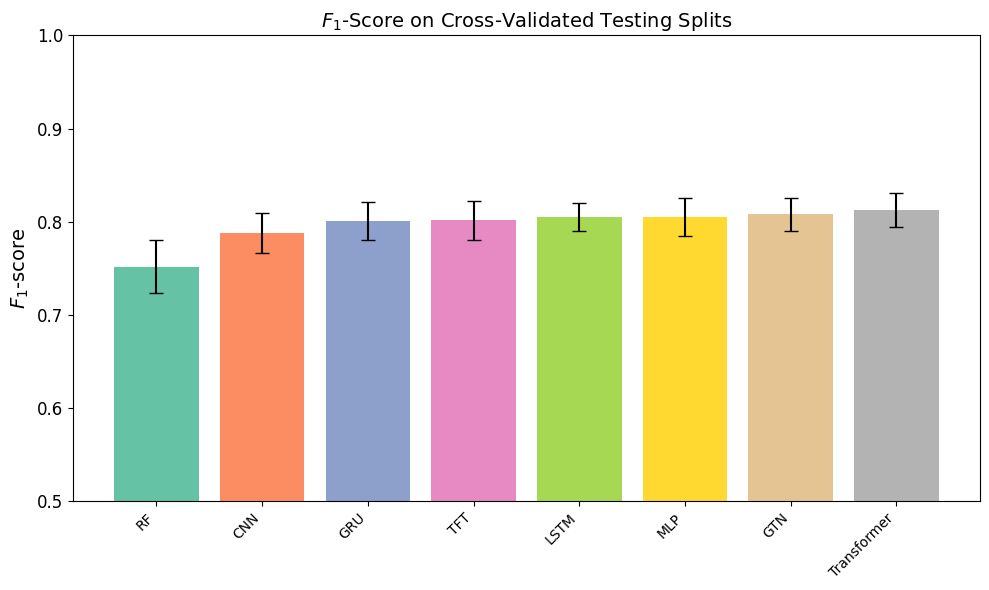

In [102]:
create_mean_std_plot("Testing")

  Abbreviations  F1_Training_mean  F1_Validation_mean  F1_Testing_mean
7            RF          0.983999            0.746053         0.751735
6           TFT          0.808841            0.811340         0.756187
5           GTN          0.814943            0.810005         0.791690
4   TRANSFORMER          0.833120            0.819077         0.807778
3           GRU          0.816778            0.808862         0.809002
2          LSTM          0.825007            0.813372         0.819558
1           CNN          0.815675            0.796122         0.819919
0           MLP          0.828276            0.811846         0.820966


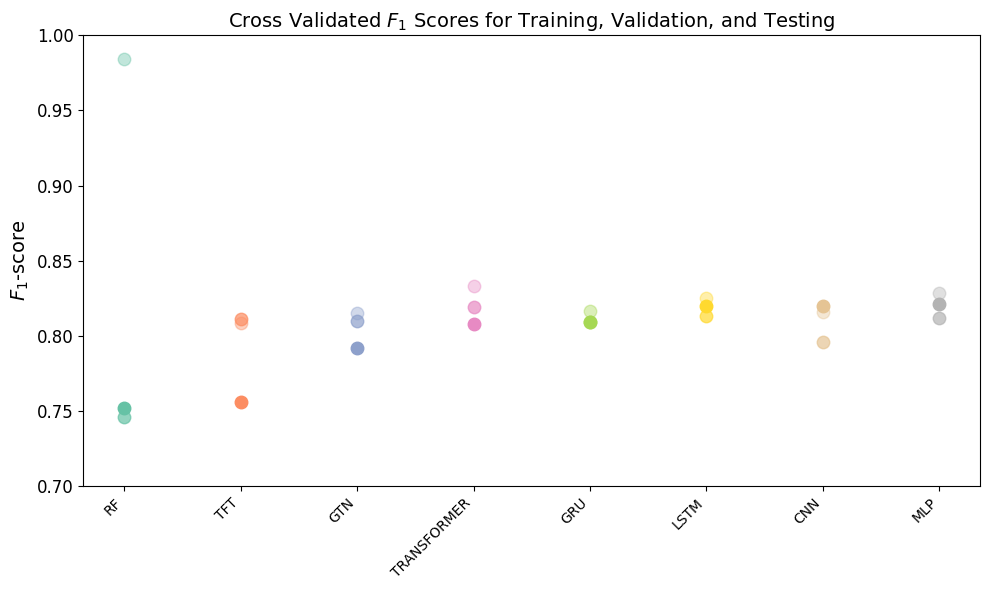

In [170]:
def plot_f1_score_points(df, model_col="Abbreviations"):
    df = df.sort_values(by='F1_Testing_mean', ascending=True).reset_index(drop=True)
    base_colors = plt.cm.Set2.colors  #plt.cm.Pastel1.colors
    n_models = len(df)
    base_colors = base_colors[:n_models]

    fig, ax = plt.subplots(figsize=(10, 6))

    for i, (_, row) in enumerate(df.iterrows()):
        x = i
        scores = [row["F1_Training_mean"], row["F1_Validation_mean"], row["F1_Testing_mean"]]
        color = base_colors[i]

        # Punkte für Training, Validation, Testing mit abgestufter Transparenz
        ax.plot(x, scores[0], 'o', color=color, alpha=0.4, markersize=9, label="_nolegend_")  # Training
        ax.plot(x, scores[1], 'o', color=color, alpha=0.7, markersize=9, label="_nolegend_")  # Validation
        ax.plot(x, scores[2], 'o', color=color, alpha=1.0, markersize=9, label="_nolegend_")  # Testing

    ax.set_xticks(np.arange(n_models))
    ax.set_xticklabels(df[model_col], rotation=45, ha="right", fontsize=10)
    ax.set_ylabel("$F_1$-score", fontsize=14)
    ax.set_ylim(0.7, 1.0)
    ax.set_title("Cross Validated $F_1$ Scores for Training, Validation, and Testing", fontsize=14)
    ax.yaxis.set_tick_params(labelsize=12)
    plt.tight_layout()
    plt.show()

# Anwendung
print(merge_df[["Abbreviations", "F1_Training_mean", "F1_Validation_mean", "F1_Testing_mean"]])

plot_f1_score_points(merge_df)

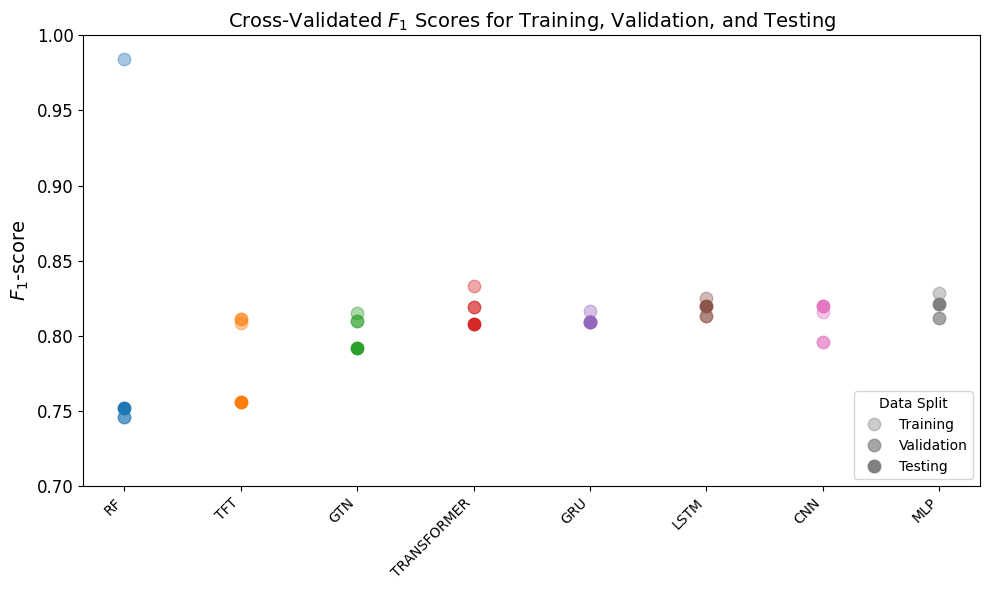

In [173]:
# Now we re-define the plotting function with contrasting colors and a meaningful legend
def plot_f1_score_points(df, model_col="Abbreviations"):
    df = df.sort_values(by='F1_Testing_mean', ascending=True).reset_index(drop=True)

    # Use a seaborn palette with many distinct colors
    palette = sns.color_palette("tab10", n_colors=len(df))

    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the three F1 points per model
    for i, (_, row) in enumerate(df.iterrows()):
        x = i
        scores = [row["F1_Training_mean"], row["F1_Validation_mean"], row["F1_Testing_mean"]]
        color = palette[i]

        ax.plot(x, scores[0], 'o', color=color, alpha=0.4, markersize=9, label="Training" if i == 0 else "_nolegend_")
        ax.plot(x, scores[1], 'o', color=color, alpha=0.7, markersize=9, label="Validation" if i == 0 else "_nolegend_")
        ax.plot(x, scores[2], 'o', color=color, alpha=1.0, markersize=9, label="Testing" if i == 0 else "_nolegend_")

    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df[model_col], rotation=45, ha="right", fontsize=10)
    ax.set_ylabel("$F_1$-score", fontsize=14)
    ax.set_ylim(0.7, 1.0)
    ax.set_title("Cross-Validated $F_1$ Scores for Training, Validation, and Testing", fontsize=14)
    ax.yaxis.set_tick_params(labelsize=12)

    # Add custom legend for transparency levels
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='gray', label='Training', markerfacecolor='gray', alpha=0.4, markersize=9, linestyle='None'),
        plt.Line2D([0], [0], marker='o', color='gray', label='Validation', markerfacecolor='gray', alpha=0.7, markersize=9, linestyle='None'),
        plt.Line2D([0], [0], marker='o', color='gray', label='Testing', markerfacecolor='gray', alpha=1.0, markersize=9, linestyle='None'),
    ]
    ax.legend(handles=legend_elements, title="Data Split", loc="lower right")

    plt.tight_layout()
    plt.show()

# Generate the updated plot
plot_f1_score_points(merge_df)


In [174]:
def get_f1_scores_by_model(datatype="Testing"):
    files = {
        "LSTM": f"{PATH}/lstm_cv_results.csv",
        "GRU": f"{PATH}/gru_cv_results.csv",
        "MLP": f"{PATH}/mlp_cv_results.csv",
        "CNN": f"{PATH}/cnn_cv_results.csv",
        "Transformer": f"{PATH}/transformer_cv_results.csv",
        "RF": f"{PATH}/rf_cv_results.csv",
        "TFT": f"{PATH}/tft_cv_results.csv",
        "GTN": f"{PATH}/gtn_cv_results.csv",
        
    }
    
    if datatype == "Validation":
        coloum_name = "val_f1_score"
    elif datatype == "Testing":
        coloum_name = "train_f1_score"
    elif datatype == "Training":
        coloum_name = "train_f1_score"
    else:
        raise ValueError("Datatype must be 'Validation', 'Testing', or 'Training'.")
    
    # Extrahiere val_f1_score für jeden Modelltyp
    f1_scores_by_model = {}
    for model_name, path in files.items():
        df = pd.read_csv(path)
        if coloum_name in df.columns:
            f1_scores_by_model[model_name] = df[coloum_name]
        else:
            print(f"Warnung: {coloum_name} nicht in {model_name}")
            
    return f1_scores_by_model

# Modellvergleich mit Kruskal-Wallis Test

In [175]:
def calculate_kruskal_wallis_test(data):
    """
    Führt den Kruskal-Wallis-Test auf den F1-Scores durch.
    
    :param data: DataFrame mit den F1-Scores der Modelle
    :return: Statistik und p-Wert des Tests
    """
    f1_scores_by_model = get_f1_scores_by_model(data)
    statistic, p_value = kruskal(*f1_scores_by_model.values())
    print(f"Kruskal-Wallis Test Statistic for {data}: {statistic}, p-value: {p_value}")
    return statistic, p_value

In [178]:
calculate_kruskal_wallis_test("Validation")
calculate_kruskal_wallis_test("Testing")

Kruskal-Wallis Test Statistic for Validation: 31.97639202858533, p-value: 4.10272501961747e-05
Kruskal-Wallis Test Statistic for Testing: 53.06512396694211, p-value: 3.598990563560811e-09


(53.06512396694211, 3.598990563560811e-09)

# Modellvergleich mit ANOVA F-Test

In [176]:
def calculate_anova_f_test(data):
    """
    Führt den ANOVA F-Test auf den F1-Scores durch.
    
    :param data: DataFrame mit den F1-Scores der Modelle
    :return: Statistik und p-Wert des Tests
    """
    f1_scores_by_model = get_f1_scores_by_model(data)
    statistic, p_value = f_oneway(*f1_scores_by_model.values())
    print(f"ANOVA F-Test Statistic for {data}: {statistic}, p-value: {p_value}")
    return statistic, p_value

In [177]:
calculate_anova_f_test("Validation")
calculate_anova_f_test("Testing")

ANOVA F-Test Statistic for Validation: 9.747790121382005, p-value: 1.9425569917375537e-09
ANOVA F-Test Statistic for Testing: 205.8538974261265, p-value: 7.135215594263077e-61


(205.8538974261265, 7.135215594263077e-61)

# Pairwise Dunn-Test with Holm-Correction

In [183]:
def calculate_dunn_test(data, path=PATH):
    """
    Führt den paarweisen Dunn-Test mit Holm-Korrektur durch.

    :param data: 'Training', 'Validation' oder 'Testing'
    :param path: Pfad zum Verzeichnis mit den CSV-Dateien
    :return: DataFrame mit paarweisen p-Werten
    """
    files = {
        "LSTM": f"{path}/lstm_cv_results.csv",
        "GRU": f"{path}/gru_cv_results.csv",
        "MLP": f"{path}/mlp_cv_results.csv",
        "CNN": f"{path}/cnn_cv_results.csv",
        "Transformer": f"{path}/transformer_cv_results.csv",
        "RF": f"{path}/rf_cv_results.csv",
        "TFT": f"{path}/tft_cv_results.csv",
        "GTN": f"{path}/gtn_cv_results.csv",
    }

    colname_map = {
        "Training": "train_f1_score",
        "Validation": "val_f1_score",
        "Testing": "test_f1_score",
    }

    col = colname_map.get(data)
    if col is None:
        raise ValueError("Datatype must be 'Validation', 'Testing', or 'Training'.")

    # Sammle Daten in langem Format
    all_scores = []
    for model, filepath in files.items():
        try:
            df = pd.read_csv(filepath)
            if col in df.columns:
                for value in df[col]:
                    all_scores.append({"Model": model, "F1": value})
            else:
                print(f"Warnung: Spalte {col} nicht in Datei {model}")
        except FileNotFoundError:
            print(f"Warnung: Datei fehlt: {filepath}")

    df_long = pd.DataFrame(all_scores)

    # Führe Dunn-Test durch
    dunn_result = sp.posthoc_dunn(df_long, val_col='F1', group_col='Model', p_adjust='holm')
    return dunn_result


In [197]:
testing_results = calculate_dunn_test("Testing")

In [196]:
def plot_dunn_heatmap(dunn_result, title="Post-hoc Dunn Test (Holm-corrected)"):
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        dunn_result,
        annot=True,
        fmt=".1e",
        cmap="RdBu",
        linewidths=0.5,
        cbar_kws={"label": "p-value"},
        square=True
    )
    plt.title(title, fontsize=16, fontweight='medium')
    plt.xticks(rotation=45, ha="right", fontsize=14, fontweight='medium')
    plt.yticks(rotation=0, fontsize=14, fontweight='medium')
    plt.tight_layout()
    plt.show()


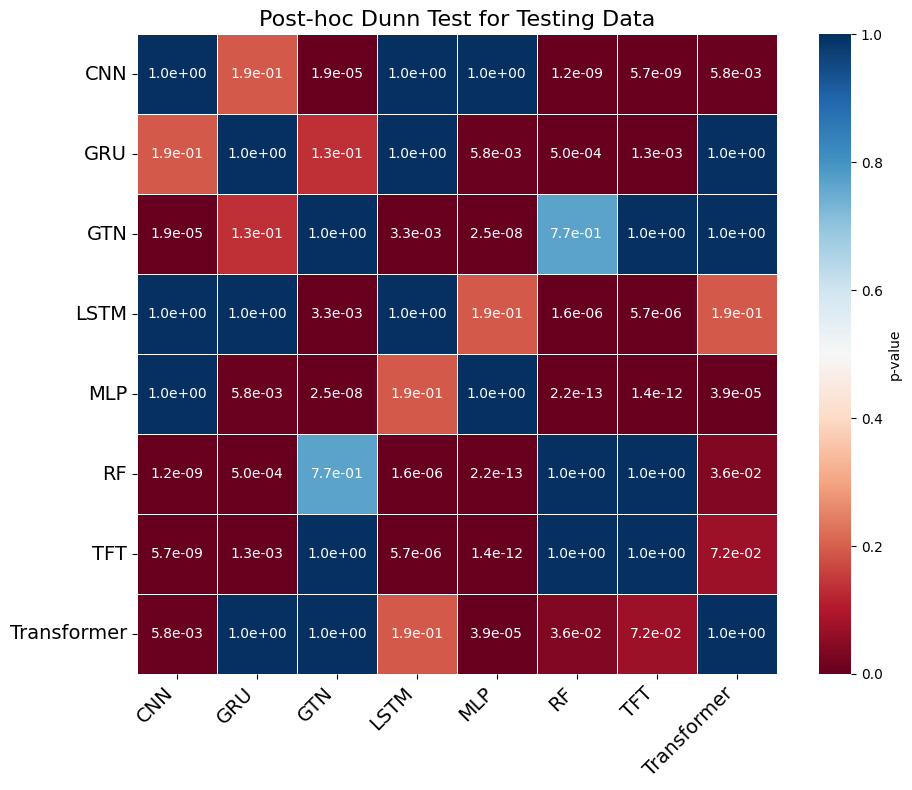

In [198]:
plot_dunn_heatmap(testing_results, 
                   title="Post-hoc Dunn Test for Testing Data")